### Importing required libraries
First, we'll import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df= pd.read_csv('Fish_dataset.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Data Pre-processing steps
1) Will check shape

In [3]:
df.shape

(159, 7)

In [4]:
nv=df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

Observed no null values

In [5]:
df.dtypes.value_counts()

float64    6
object     1
dtype: int64

obsereved object datatype of one columns

In [6]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

obsereved object datatype of 'Species' columns

In [7]:
df.duplicated().sum()

0

obsereved no duplicates

In [8]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
print(cat_cols)
num_cols = [i for i in df.columns if df[i].dtypes!='object']
print(num_cols)

['Species']
['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


### Catagorical columns

In [9]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Univariate Analysis
Bar chart showing count of individual species

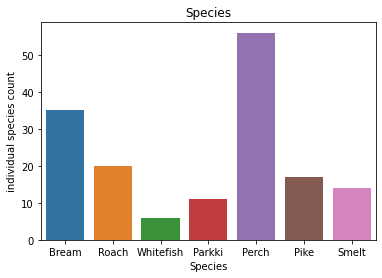

In [10]:
sns.countplot(x=df['Species'])
plt.title('Species')
plt.ylabel('individual species count')
plt.show()

#### checking outliers by plotting boxplot

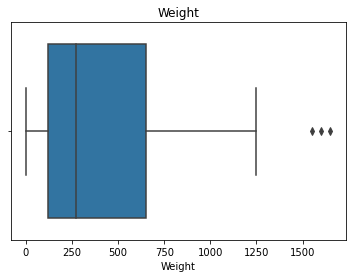

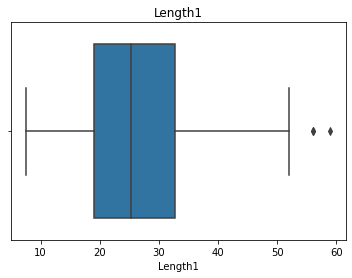

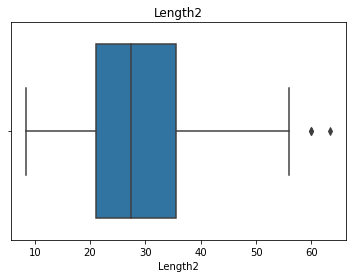

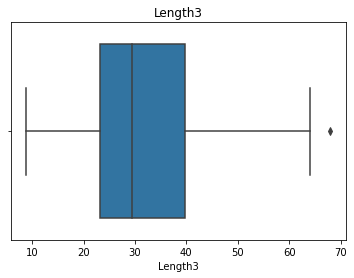

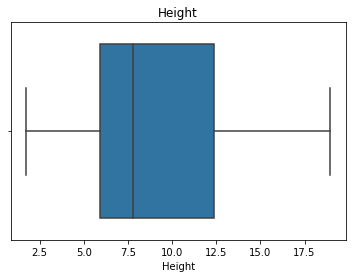

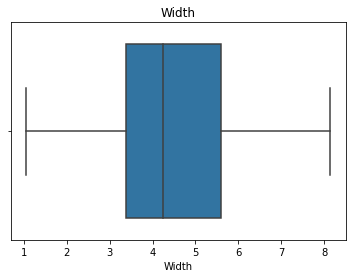

In [11]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

### Outliers Treatment

observed outliers in weight,Length1,Length2,Length3

In [12]:
df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
Weight,159.0,398.326415,357.978317,0.0000,6.364000,7.080000,8.388000,273.0000,1100.000000,1226.000000,1571.000000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,9.706000,10.148000,10.622000,25.2000,45.710000,51.408000,56.000000,59.000
Length2,159.0,28.415723,10.716328,8.4000,10.206000,10.664000,11.148000,27.3000,48.962000,55.312000,60.000000,63.400
Length3,159.0,31.227044,11.610246,8.8000,11.264000,11.664000,12.296000,29.4000,52.214000,58.964000,64.000000,68.000
Height,159.0,8.970994,4.286208,1.7284,1.874056,1.995000,2.088528,7.7860,17.730984,18.076464,18.685296,18.957
Width,159.0,4.417486,1.685804,1.0476,1.148400,1.160944,1.232426,4.2485,7.466976,7.491256,7.679758,8.142


In [13]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [14]:
outliers_cols = ['Weight','Length1','Length2','Length3']

In [15]:
df[outliers_cols]= df[outliers_cols].apply(outlier_treatment)

In [16]:
df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
Weight,159.0,397.690113,355.620530,6.3640,6.558880,7.080000,8.388000,273.0000,1100.000000,1226.000000,1558.820000,1571.000
Length1,159.0,26.244730,9.907738,9.7060,9.876520,10.148000,10.622000,25.2000,45.710000,51.408000,56.000000,56.000
Length2,159.0,28.408252,10.624292,10.2060,10.376520,10.664000,11.148000,27.3000,48.962000,55.312000,60.000000,60.000
Length3,159.0,31.220302,11.500323,11.2640,11.458880,11.664000,12.296000,29.4000,52.214000,58.964000,64.000000,64.000
Height,159.0,8.970994,4.286208,1.7284,1.874056,1.995000,2.088528,7.7860,17.730984,18.076464,18.685296,18.957
Width,159.0,4.417486,1.685804,1.0476,1.148400,1.160944,1.232426,4.2485,7.466976,7.491256,7.679758,8.142


### Bi-Variate Analysis

Checking linearity in all the columns

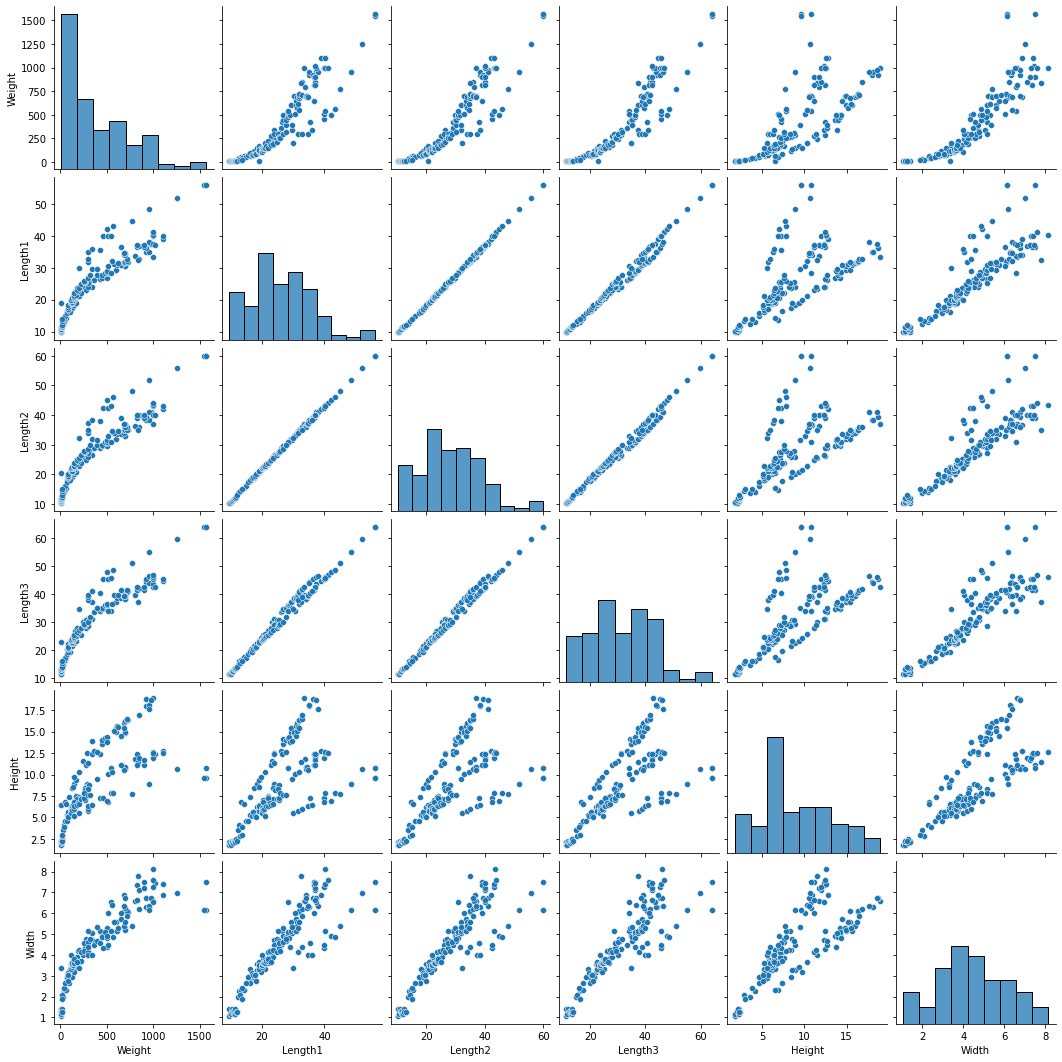

In [17]:
sns.pairplot(df)
plt.show()

### Correlation

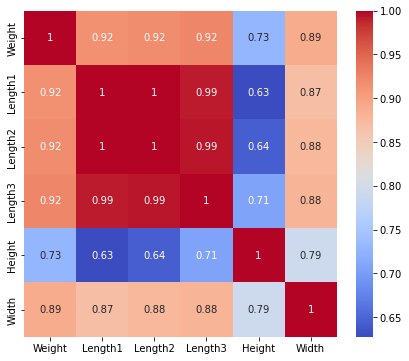

In [18]:
corr= df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

Multicolinearity observed in many columns but we are not dropping the columns as the data is very small,so thr is no need to drop the smiliar columns

### Encoding
Encoding categorial data

In [19]:
df1=df.copy()
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb= LabelEncoder()
for i in cat_cols:
    df1[i] = lb.fit_transform(df1[i])

In [22]:
df1['Species'].value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

### Splitting the data

In [23]:
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
df1.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [25]:
x = df1[['Species','Length1','Length2','Length3','Height','Width']]
y = df1.iloc[:,1] 
print(x.shape)
print(y.shape)

(159, 6)
(159,)


Specifying value for x and y

In [26]:
x.head()

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340


In [27]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 6)
(40, 6)
(119,)
(40,)


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print('Prediction\n',y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)

In [31]:
m1 = LinearRegression()
gen_metrics(m1,x_train,x_test,y_train,y_test)

Prediction
 [  60.8938956  -107.7258095   386.74504057  401.56783722  137.40350109
  816.66692493 -175.94155748  302.66507341  243.83890606 1132.48561135
  585.09665496  914.11896781  582.65321997  169.15293497  666.39511705
  819.46183599  918.17198003  347.13804244  260.33359879  581.9907141
 -134.93592055  642.45452466  524.24547221  499.13876202  826.57410938
  924.12564337  199.39236119  400.22406637 -188.81956035 -134.09961978
  694.12143005  -12.72577499  -15.64863076  835.58992767  320.71091539
  151.23554182  199.57203224  142.49111808  237.09126991  840.41262848]
Training score 0.893052952598297
Testing score 0.9031790072474325


In [32]:
# Y_pred = mx + c
m = m1.coef_
c = m1.intercept_
print('Coefficient or Slope',m)
print('Intercept or Constant',c)

Coefficient or Slope [ 28.87888393  48.20714713  28.88614278 -48.5274598   45.81938697
  -7.09330592]
Intercept or Constant -621.5510187705956


In [33]:
df1.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [34]:
# Y_pred = mx + c
df1['y_pred_eqn'] = df1['Species']*m[0] + df1['Length1']*m[1] + df1['Length2']*m[2] + df1['Length3']*m[3] + df1['Height']*m[4] + df1['Width']*m[5] + c
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,y_pred_eqn
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,274.063275
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,322.354333
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,320.710915
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,410.001759
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,377.462306


### mean score of the model at 95% confidence interval

1) Using Ridge

In [35]:
from sklearn.linear_model import Ridge

In [36]:
# lambda = alpha
m2 = Ridge(alpha=0.05)
gen_metrics(m2,x_train,x_test,y_train,y_test)

Prediction
 [  60.89644963 -107.86492582  386.76712725  401.51217209  137.53290011
  816.58515241 -176.04083329  302.648599    243.88567321 1132.53350008
  585.16487034  913.90580609  582.6521151   169.04825719  666.38191391
  819.39168455  918.21806038  346.99957249  260.25288458  581.9942694
 -135.04035741  642.31623436  524.14937309  499.16780156  826.48141577
  924.01113524  199.42275645  400.19659003 -188.91818856 -134.22260614
  694.08315458  -12.63431922  -15.67900078  835.44886265  320.89550396
  151.26435647  199.68699549  142.56398336  236.89802084  840.26757909]
Training score 0.893052875868838
Testing score 0.9031630138673814


In [37]:
# Y_pred = mx + c
m1 = m2.coef_
c1 = m2.intercept_
print('Coefficient or Slope',m1)
print('Intercept or Constant',c1)

Coefficient or Slope [ 28.83842928  48.04175674  28.87347881 -48.37083985  45.72107891
  -6.93597344]
Intercept or Constant -621.4708966607577


There is a very slight change is observed in cofficient and intercept ,mean score has no change in comparison to linear model and ridge model.
so we are putting only one ypred_eqn

In [38]:
df1['y_pred_eqn2'] = df1['Species']*m1[0] + df1['Length1']*m1[1] + df1['Length2']*m1[2] + df1['Length3']*m1[3] + df1['Height']*m1[4] + df1['Width']*m1[5] + c1
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,y_pred_eqn,y_pred_eqn2
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,274.063275,274.183242
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,322.354333,322.469092
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,320.710915,320.895504
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,410.001759,410.061161
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,377.462306,377.701806


In [39]:
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,y_pred_eqn,y_pred_eqn2
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,274.063275,274.183242
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,322.354333,322.469092
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,320.710915,320.895504
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,410.001759,410.061161
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,377.462306,377.701806


### Fomulating new DataFrame for comparing real and predicted weights¶

In [40]:
ypred_m_LR=df1['y_pred_eqn']
ypred_m_LR

0      274.063275
1      322.354333
2      320.710915
3      410.001759
4      377.462306
          ...    
154   -134.735811
155   -107.725810
156    -92.586237
157    -48.401151
158    -43.728810
Name: y_pred_eqn, Length: 159, dtype: float64

In [41]:
ytest_wgt=df1['Weight']
weight_comparison=pd.DataFrame({'ytest_wgt':ytest_wgt,'ypred_m_LR':ypred_m_LR})
weight_comparison

,ytest_wgt,ypred_m_LR
0,242.0,274.063275
1,290.0,322.354333
2,340.0,320.710915
3,363.0,410.001759
4,430.0,377.462306
...,...,...
154,12.2,-134.735811
155,13.4,-107.725810
156,12.2,-92.586237
157,19.7,-48.401151


### Conclusion statement:
we are getting better results from Linear Regression model and same as from Ridge